In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
# from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)
from pandas.plotting import table 
import nltk
import seaborn as sns
%matplotlib inline

# N-grams
In this notebook the frequent patterns will be investigated using a text analytical approach, centered around N-grams. This provide an alternative to using the frequent pattern mining algorithm VMSP.

## Outline
1. Data set with 70% coverage.\
    1.1 with merged repeating apps, after removal.\
2. Full data set\
    2.1 0.75 %\
    2.2 Transition matrix
3. Individual perspectiv\
    3.1 frequent apps

## Data set with 70% individual coverage.
For direct comparison the N-grams are found for the same data set as the VMSP was run on.

In [61]:
data_coverage_70=pd.read_csv("data_coverage_70.csv")

In [62]:
print("Number of number of observations:",data_coverage_70.shape[0])
print("Number of different apps left:",data_coverage_70.app_code.nunique())

Number of number of observations: 90303962
Number of different apps left: 2268


In [67]:
data_coverage_70

,package_name,user_id,start_time,end_time,time_spend_x,app_code,sequence_number,sequence_Start_time,sequence_end_time,sleep_time,new_session,session,time_spend_y,time_spend_total,coverage,session_length
0,com.android.chrome,0,441,1012,571,7649,2,441,1012,0,False,0,831069,1688521,0.492188,2
1,com.google.android.youtube,0,1582,1712,130,23967,6,1582,1712,10,False,0,1149788,1688521,0.680944,2
2,com.android.chrome,0,3926,4076,150,7649,12,3926,4076,0,False,2,831069,1688521,0.492188,1
3,com.android.chrome,0,32291,32769,478,7649,24,32291,32769,40,False,6,831069,1688521,0.492188,2
4,com.google.android.youtube,0,32091,32101,10,23967,22,32091,32101,2142,True,6,1149788,1688521,0.680944,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90303957,com.google.android.youtube,9999,26588896,26588966,70,23967,13303,26588896,26588966,754,True,5100,1002729,1360485,0.737038,1
90303958,com.google.android.youtube,9999,26628994,26629112,118,23967,13333,26628994,26629112,339,True,5111,1002729,1360485,0.737038,1
90303959,com.google.android.youtube,9999,26703610,26703880,270,23967,13368,26703610,26703880,3073,True,5125,1002729,1360485,0.737038,1
90303960,com.google.android.youtube,9999,26704637,26704647,10,23967,13369,26704637,26704647,757,True,5126,1002729,1360485,0.737038,1


Since the VMSP was only running on sessions with more than one app, all sessions of length one is filtered out.

In [168]:
data_coverage_70_min_length_2=data_coverage_70[data_coverage_70.session_length>1]

In [169]:
user_corpus_70=data_coverage_70_min_length_2.groupby(['user_id','session']).package_name.apply(' '.join)

In [170]:
print("Number of sessions:",user_corpus_70.shape[0])
print("0.75% of sessions:",user_corpus_70.shape[0]/100*0.75)

Number of sessions: 18193255
0.75% of sessions: 136449.41249999998


### Frequent apps (1-gram)

In [142]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['bbc.mobile.news.uk', 'com.android.chrome', 'com.android.incallui',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging', 'com.google.android.gm',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.snapchat.android', 'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonymobile.email',
       'com.spotify.music', 'com.twitter.android', 'com.whatsapp',
       'com.yahoo.mobile.client.android.mail'], dtype=object)

In [143]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 23


Here the same apps are found to be frequent as with VMSP.

### 2-grams

In [172]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['com.android.chrome com.android.chrome',
       'com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.android.incallui',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.katana',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.instagram.android',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.android.chrome',
       'com.facebook.orca com.facebook.orca',
       'com.google.android.gm com.google.android.gm',
       'com.google.android.googlequicksearchbox com.android.chrome',
       

In [174]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 39


### 3-grams

In [175]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['com.android.chrome com.android.chrome com.android.chrome',
       'com.android.chrome com.whatsapp com.whatsapp',
       'com.facebook.katana com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.katana com.facebook.katana',
       'com.facebook.orca com.facebook.orca com.facebook.orca',
       'com.google.android.googlequicksearchbox com.android.chrome com.android.chrome',
       'com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox',
       'com.instagram.android com.instagram.android com.instagram.android',
       'com.snapchat.android com.snapchat.android com.snapchat.android',
       'com.sonyericsson.conversations com.sonyericsson.conversations com.sonyericsson.conversations',
       'com.whatsapp com.whatsapp com.android.chrome',
       'com.whatsapp com.whatsapp com.wha

In [176]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 13


### 4-grams

In [179]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['com.android.chrome com.android.chrome com.android.chrome com.android.chrome',
       'com.facebook.katana com.facebook.katana com.facebook.katana com.facebook.katana',
       'com.facebook.orca com.facebook.orca com.facebook.orca com.facebook.orca',
       'com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox com.android.chrome com.android.chrome',
       'com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox com.google.android.googlequicksearchbox',
       'com.sonyericsson.conversations com.sonyericsson.conversations com.sonyericsson.conversations com.sonyericsson.conversations',
       'com.whatsapp com.whatsapp com.whatsapp com.whatsapp'],
      dtype=object)

In [180]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 7


### 5.grams

In [181]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['com.whatsapp com.whatsapp com.whatsapp com.whatsapp com.whatsapp'],
      dtype=object)

In [182]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 1


### 6-grams

In [183]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(6,6))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array([], dtype=object)

In [184]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 0


### Mereged repeating apps

In [187]:
data_coverage_70["previous_app_code"]=data_coverage_70.groupby(["user_id","session"]).app_code.shift(1)
data_merge=data_coverage_70.copy()
data_merge=data_merge[(data_merge.previous_app_code==data_merge.app_code) | (data_merge.app_code==data_merge.groupby(['user_id','session']).app_code.shift(-1))]
data_merge['new_event'] = data_merge.previous_app_code!=data_merge.app_code
data_merge['event'] = data_merge.groupby(['user_id','session']).new_event.cumsum().astype('int')

In [189]:
data2_grouped = data_merge.groupby(['user_id', 'session','event']).agg({'end_time':'max'})

data2_grouped = data2_grouped.reset_index()

data2_grouped = data2_grouped.rename(columns={'end_time':'event_end_time'})

data3 = pd.merge(data_merge, data2_grouped, how='left', on=['user_id', 'session','event'])

data3 = data3[data3['end_time'] == data3['event_end_time']]

#because in the same event more apps can be closed at once.
data3=data3.drop_duplicates(subset=['user_id', 'session','event'], keep='last')
max_index=data_merge.iloc[data3.index].index

In [190]:
data2_grouped = data_merge.groupby(['user_id', 'session','event']).agg({'start_time':'min'})

data2_grouped = data2_grouped.reset_index()

data2_grouped = data2_grouped.rename(columns={'start_time':'event_start_time'})

data3 = pd.merge(data_merge, data2_grouped, how='left', on=['user_id', 'session','event'])

data3 = data3[data3['start_time'] == data3['event_start_time']]

#because in the same event more apps can be opened at once.
data3=data3.drop_duplicates(subset=['user_id', 'session','event'], keep='last')
min_index=data_merge.iloc[data3.index].index

In [192]:
data3=data_coverage_70.copy()
data3.loc[max_index,"start_time"]=data3.loc[min_index].set_index(max_index).start_time
data3=data3.drop(set(data_merge.index)-set(max_index))
len(data_coverage_70.index)-(len(data_merge.index)-len(max_index))==len(data3.index)

True

In [193]:
data3['time_spend']=data3['end_time']-data3['start_time']
data3=data3.drop('previous_app_code',axis=1)
data3['sleep_time']=data3.start_time-data3.sequence_end_time.shift(1,fill_value=0)
data3.loc[data3[data3['sleep_time']<0].index,'sleep_time']=0
data3=data3.reset_index(drop=True)

In [194]:
data3.to_csv("70_coverage_merged.csv",index=False)

In [195]:
data3=data3[data3.session_length>1]

In [196]:
user_corpus_70=data3.groupby(['user_id','session']).package_name.apply(' '.join)

In [197]:
print("Number of sessions:",user_corpus_70.shape[0])
print("0.75% of sessions:",user_corpus_70.shape[0]/100*0.75)

Number of sessions: 18193255
0.75% of sessions: 136449.41249999998


#### 1-grams

In [199]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['bbc.mobile.news.uk', 'com.android.chrome', 'com.android.incallui',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging', 'com.google.android.gm',
       'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.snapchat.android', 'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonymobile.email',
       'com.spotify.music', 'com.twitter.android', 'com.whatsapp',
       'com.yahoo.mobile.client.android.mail'], dtype=object)

In [200]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 23


In [201]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.whatsapp',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.instagram.android',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome',
       'com.instagram.android com.android.chrome',
       'com.instagram.android com.facebook.katana',
       'com.instagram.android com.snapchat.android',
       'com.instagram.android com.whatsapp',
       'com.snapchat.android com.instagram.android',
   

In [202]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 25


In [203]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization=vectorizer.fit_transform(user_corpus_70.values)
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]

array([], dtype=object)

In [204]:
print("Number of frequent patterns:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>=136450)[1]]))

Number of frequent patterns: 0


## Full data set
In the following we will start out by working with the full data set. The data set has already been divided into sessions based on a 293 seconds sleep time threshold, and any repeating apps have been merged. There are 76775122 sessions which in the following analysis each is represented as a document, containt a string of the apps package names which are seperated by whitespace.

In [2]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")

In [ ]:
user_corpus=data.groupby(['user_id','session']).package_name.apply(' '.join)

### Minimum frequency comparative to VMSP
In the same way as the frequent pattern mining algorithm has the minimum support parameter, a minimum frequency will be used to filter the obtained patterns. In the following section the minimum frequency corresponds to 136450 occurences. This is the same number of seesions needed to obtain minimum support of 0.75 when running the VMSP on "293sec_sessions_70_coverage_without_length_1.txt"

#### 1-gram and frequent apps
The first step is to take a look at the 1-grams, which corresponds to finding the frequent apps.

In [228]:
vectorizer_1gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)

In [229]:
vectorization_1gram=vectorizer_1gram.fit_transform(user_corpus.values)

In [91]:
vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>136450)[1]]

array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'co.uk.Nationwide.Mobile', 'com.accuweather.android',
       'com.amazon.kindle', 'com.amazon.mShop.android.shopping',
       'com.amazon.mp3', 'com.android.chrome', 'com.android.email',
       'com.android.incallui', 'com.android.phone',
       'com.audible.application',
       'com.barclays.android.barclaysmobilebanking', 'com.bskyb.fbscore',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.dailymail.online', 'com.discord', 'com.ebay.mobile',
       'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.musi

In [92]:
print("Number of frequent apps:",vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>136450)[1]].shape[0])

Number of frequent apps: 87


Since we are here able to work with the full data set a 0.75 support percentage is not neccessarily the same.

### Minimum frequency of 0.75% of full data set

In [59]:
print("number of sessions:",user_corpus.shape[0])
print("0.75% of sessions:",user_corpus.shape[0]/100*0.75)

number of sessions: 76775122
0.75% of sessions: 575813.415


#### 1-grams and frequent apps
Since the 1-grams where already determined in the previous section, only the filtering needs to be updated to match the overall 0.75% minimum. Based on the above calculations, the minimum is determined to correspond to 575814 sessions.

In [230]:
frequent_apps=vectorizer_1gram.get_feature_names_out()[np.where((vectorization_1gram>0).sum(axis=0)>575814)[1]]
frequent_apps

array(['bbc.mobile.news.uk', 'com.amazon.mShop.android.shopping',
       'com.android.chrome', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.twitter.android', 'com.whatsapp',
       'com.yahoo.mobile.client.android.mail'], dtype=object)

In [61]:
print("Number of frequent apps:",len(frequent_apps))

Number of frequent apps: 29


With 29 apps the number of found sessions are much lower, but also more comparable to the 25 frequenct apps found with VMSP. Furthermore almost all frequent apps found with VMSP are included.

In [96]:
fig = px.bar(x=frequent_apps, y = [(vectorization_1gram>0).sum(axis=0)[0,np.where(vectorizer_1gram.get_feature_names_out()==app)[0][0]] for app in frequent_apps],width=900,height=600)
fig.update_layout(
    xaxis_title="Apps",
    yaxis_title="Number of sessions with app")
fig.update_xaxes(type='category',tickangle = 45)

In [97]:
fig = px.bar(x=frequent_apps, y = [vectorization_1gram.sum(axis=0)[0,np.where(vectorizer_1gram.get_feature_names_out()==app)[0][0]] for app in frequent_apps],width=900,height=600)
fig.update_layout(
    xaxis_title="Apps",
    yaxis_title="Number of observations of app")
fig.update_xaxes(type='category',tickangle = 45)

#### 2-grams
We now investigate which patterns of length two occrue with at least the minimum frequency.

In [231]:
vectorizer_2gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2))

In [234]:
vectorization_2gram=vectorizer_2gram.fit_transform(user_corpus.values)

In [235]:
print("Number of 2-grams:",len(vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>575814)[1]]))#29

Number of 2-grams: 29


In [236]:
lengt_2_patterns=vectorizer_2gram.get_feature_names_out()[np.where((vectorization_2gram>0).sum(axis=0)>575814)[1]]
lengt_2_patterns

array(['com.android.chrome com.facebook.katana',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.whatsapp',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.facebook.katana com.android.chrome',
       'com.facebook.katana com.facebook.orca',
       'com.facebook.katana com.google.android.googlequicksearchbox',
       'com.facebook.katana com.instagram.android',
       'com.facebook.katana com.snapchat.android',
       'com.facebook.katana com.sonyericsson.conversations',
       'com.facebook.katana com.whatsapp',
       'com.facebook.orca com.facebook.katana',
       'com.google.android.gm com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.facebook.katana',
       'com.google.android.googlequicksearchbox com.whatsapp',
       'com.instagram.android com.facebook.katana',
       'com.instagram.android com.whatsap

As for the 1-grams we also here recongnise serveral of the patterns from the VMPS output.

#### 3-grams
At last we look at the patterns of length 3

In [237]:
vectorizer_3gram = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3))
vectorization_3gram=vectorizer_3gram.fit_transform(user_corpus.values)

In [238]:
length_3_patterns=vectorizer_3gram.get_feature_names_out()[np.where((vectorization_3gram>0).sum(axis=0)>575814)[1]]
length_3_patterns

array(['com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'com.whatsapp com.facebook.katana com.whatsapp'], dtype=object)

In [70]:
print("Number of 3-grams:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>575814)[1]]))#2

Number of 3-grams: 2


None of the patterns of length 3 were found with VMSP. Furthermore it is observed that for all 4 patterns, the apps in one patterns are similar in category.

#### 4-grams
Below in can be seen that the data set does not contain any patterns of legnth four, so all frequent patterns has been found.

In [71]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4))
vectorization=vectorizer.fit_transform(user_corpus.values)

In [72]:
vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>575814)[1]]

array([], dtype=object)

In [73]:
print("Number of 4-grams:",len(vectorizer.get_feature_names_out()[np.where((vectorization>0).sum(axis=0)>575814)[1]]))

Number of 4-grams: 0


### Transition matrix
To analys the patterns found for the full data set, with 0.75% minsup. a transaction matrix is created for the frequent apps. This represent a easier way to get an overview of the frequent patterns in the data set.
The transaction matrix show the probability of going from one app to the next.

In [98]:
data = data.loc[:,['user_id','session','package_name']]

Firste the number of occurences of each frequent apps is counted.

In [99]:
df_frequent_app_count = data[data.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

The next step is to calculate the number of times each frequent app is next in the use sequence after each frequent app.

In [100]:
data['next_app'] = data.groupby(['user_id','session']).package_name.shift(-1)

In [101]:
df_next_app_count=data[data.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

Now that all neccessary numbers have been found, the transaction matrix can be constructed.

In [102]:
df_numerator = df_next_app_count[df_next_app_count.index.get_level_values('next_app').isin(frequent_apps)].reset_index()

In [103]:
df_frequent_app_count=df_frequent_app_count.reset_index()

In [104]:
df_transaction = df_numerator.merge(df_frequent_app_count, on='package_name')

In [105]:
df_transaction['probability'] =df_transaction.next_count/df_transaction.app_count*100

In [106]:
df_transaction.drop(['next_count', 'app_count'], axis=1, inplace=True)

In [107]:
Transaction_matrix = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

In [108]:
Transaction_matrix=Transaction_matrix.fillna(0)

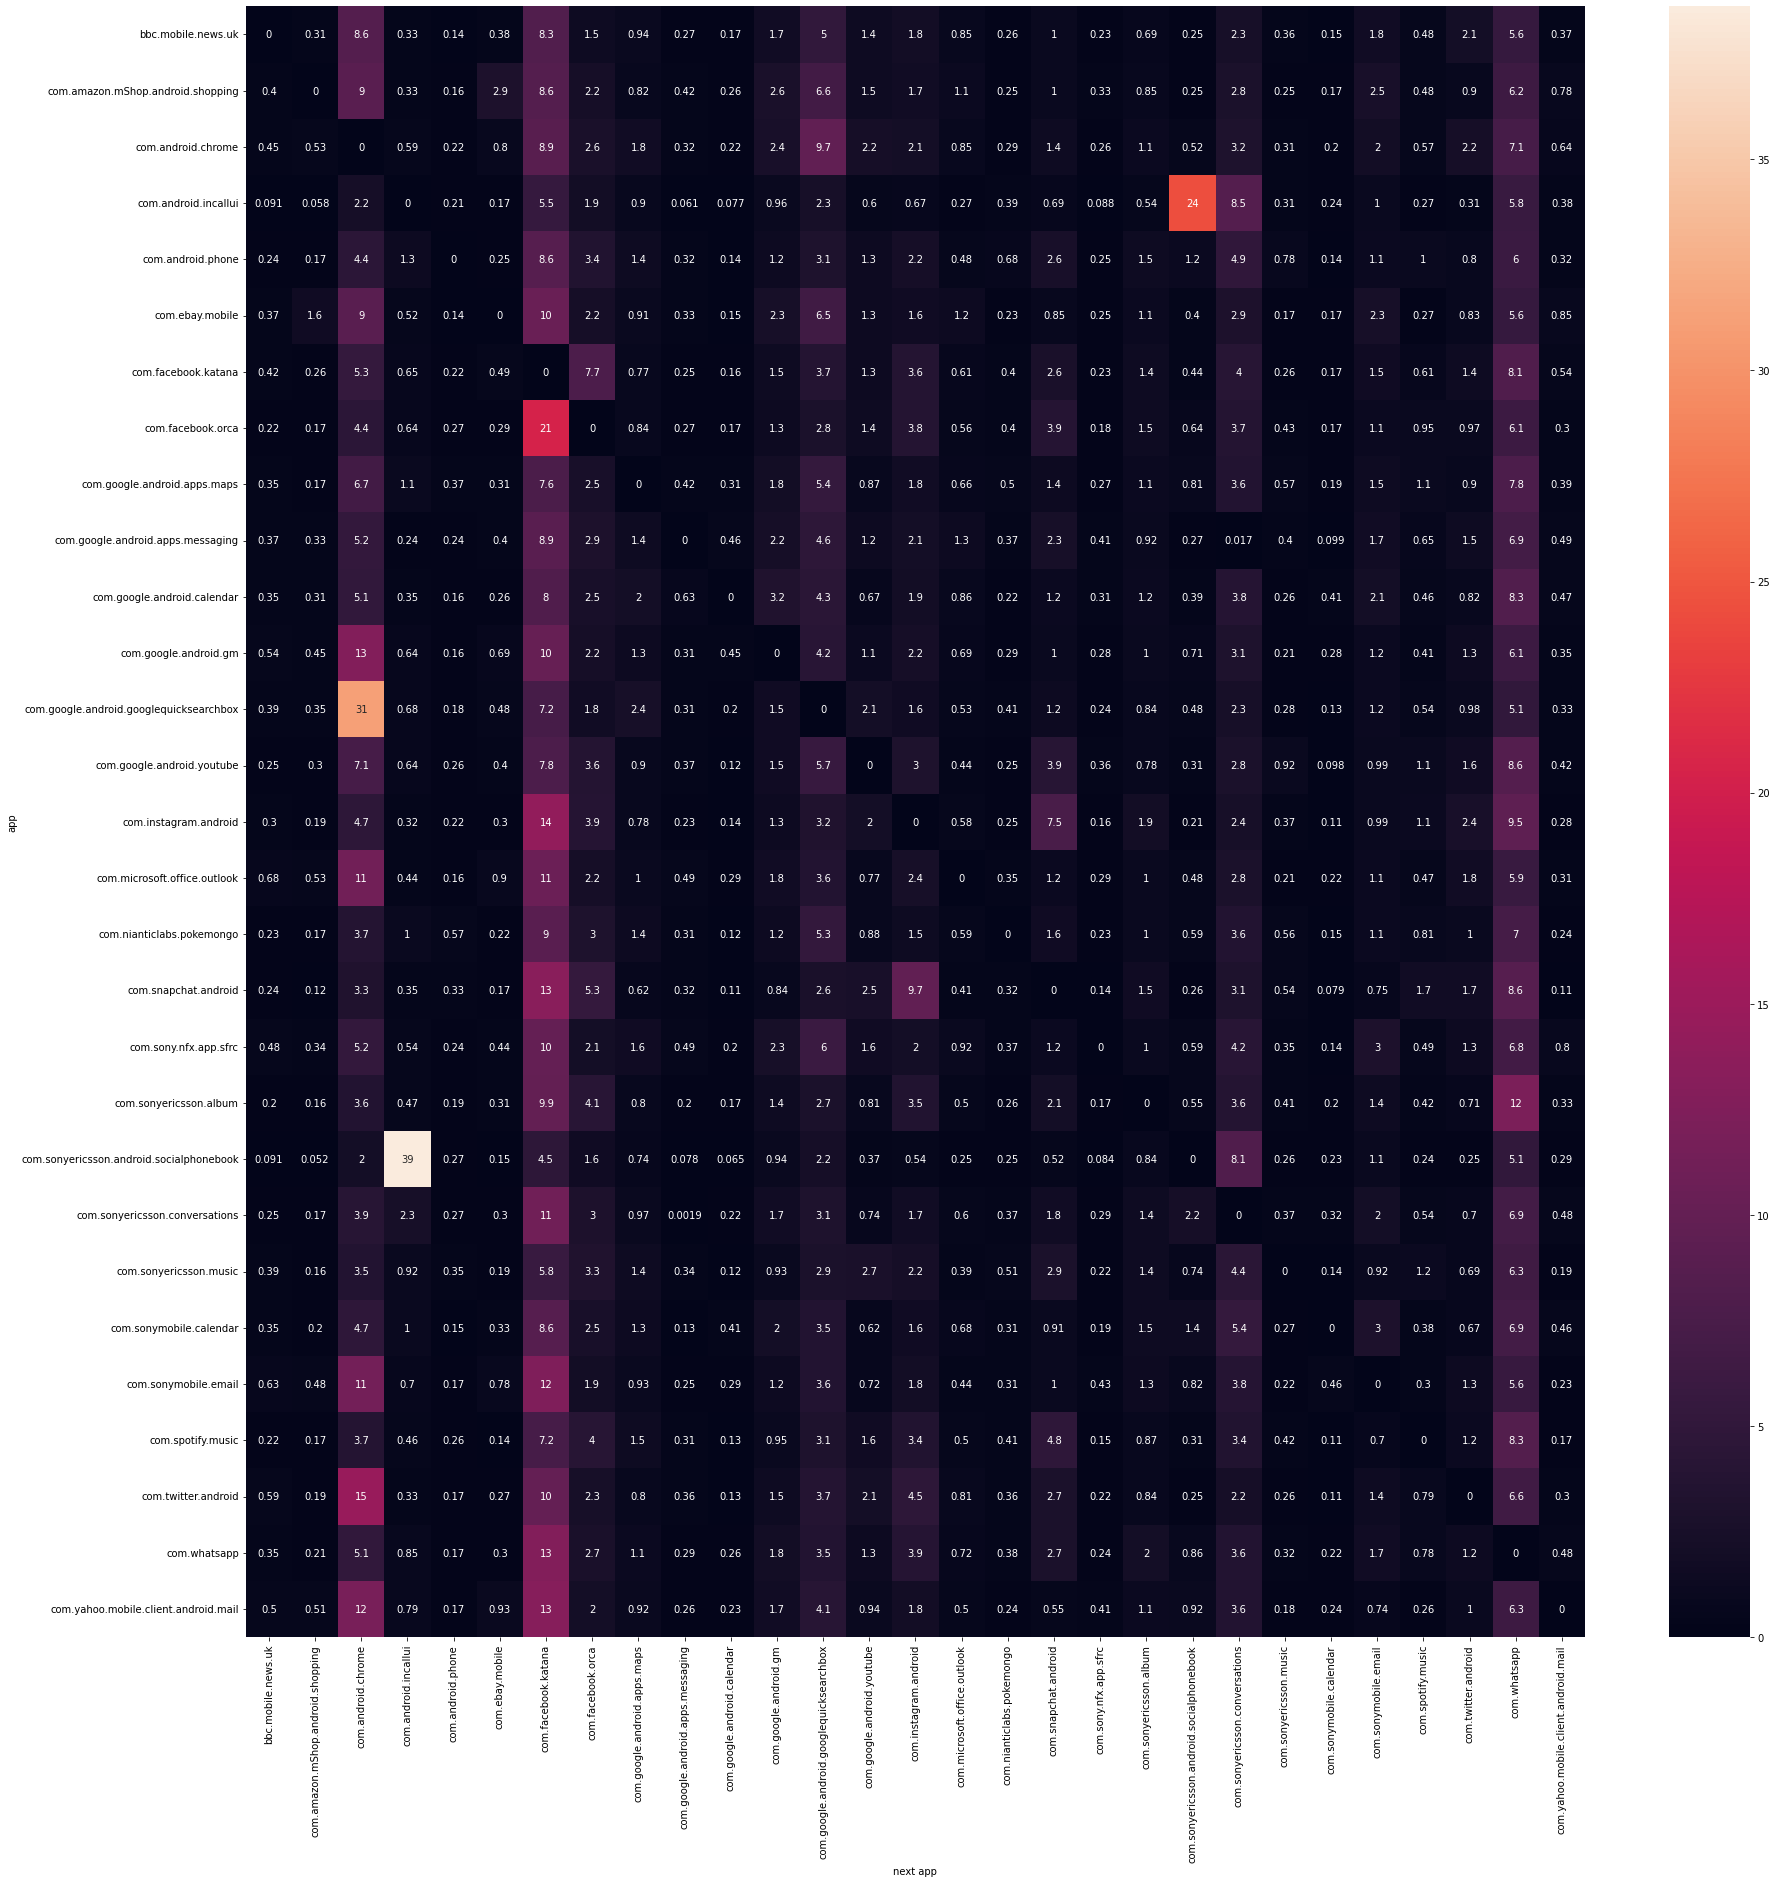

In [109]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(Transaction_matrix, annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

### Transition matrix with log

To increase the interpreability of the matrix we will here take a look at the log version.

In [ ]:
from nltk import word_tokenize, sent_tokenize 
from nltk.tokenize import WhitespaceTokenizer
import nltk

In [330]:
user_corpus[0,0]

'com.facebook.katana com.android.chrome com.google.android.apps.photos com.facebook.katana com.whatsapp com.google.android.youtube com.whatsapp'

In [337]:
tk= WhitespaceTokenizer()
tk.tokenize(user_corpus[0,0])

['com.facebook.katana',
 'com.android.chrome',
 'com.google.android.apps.photos',
 'com.facebook.katana',
 'com.whatsapp',
 'com.google.android.youtube',
 'com.whatsapp']

In [338]:
tokenized_text = [tk.tokenize(session) for session in user_corpus]

In [339]:
tokenized_text

[['com.facebook.katana',
  'com.android.chrome',
  'com.google.android.apps.photos',
  'com.facebook.katana',
  'com.whatsapp',
  'com.google.android.youtube',
  'com.whatsapp'],
 ['com.whatsapp'],
 ['com.whatsapp',
  'com.facebook.katana',
  'com.whatsapp',
  'bg.abv.andro.emailapp',
  'com.android.chrome',
  'com.whatsapp'],
 ['com.whatsapp'],
 ['com.facebook.katana', 'com.viber.voip', 'com.whatsapp'],
 ['com.facebook.katana',
  'com.google.android.apps.translate',
  'com.facebook.katana',
  'com.sonymobile.moviecreator.rmm',
  'com.google.android.youtube'],
 ['com.google.android.youtube',
  'com.google.android.apps.photos',
  'com.android.chrome'],
 ['com.android.chrome', 'com.sonyericsson.album', 'bg.abv.andro.emailapp'],
 ['com.android.chrome'],
 ['com.android.chrome',
  'bg.abv.andro.emailapp',
  'com.android.chrome',
  'com.facebook.katana',
  'com.android.chrome',
  'com.adobe.reader',
  'com.google.android.youtube',
  'com.facebook.katana'],
 ['com.sonyericsson.android.socialp

In [298]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")

In [299]:
df_frequent_app_count = data[data.package_name.apply(lambda l : l in frequent_apps)].groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

KeyboardInterrupt: 

In [319]:
df_app_count=pd.DataFrame({'package_name':vectorizer_1gram.get_feature_names_out(),'app_count':np.array(vectorization_1gram.sum(axis=0))[0,:]})

In [320]:
df_app_count

,package_name,app_count
0,AppZappy.NIRailAndBus,52
1,AutomateItPro.mainPackage,453
2,B4A.BigFivePersonalityTest,1
3,ChilliZET.app,21
4,DOCECG2.doctor,9
...,...,...
67083,zz.freesport.fitnessworkout.jump_rope,1
67084,zz.freesport.fitnessworkout.qigong,5
67085,zz.workout.fitness.dumbbell_30min,2
67086,zzy.heartEN,4


In [321]:
data['next_app'] = data.groupby(['user_id','session']).package_name.shift(-1)

In [ ]:
df_next_app_count=data[data.package_name.isin(frequent_apps)].groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

# Individual perspective
In this section the individual users usage is compared with the overall persepctive.
## Frequently used apps
Initially we take a closer look at the frequent apps found as the 1-grams for the whole data set which occur in at least 0.75%.

In [74]:
frequent_apps

array(['bbc.mobile.news.uk', 'com.amazon.mShop.android.shopping',
       'com.android.chrome', 'com.android.incallui', 'com.android.phone',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.google.android.apps.maps',
       'com.google.android.apps.messaging', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.googlequicksearchbox',
       'com.google.android.youtube', 'com.instagram.android',
       'com.microsoft.office.outlook', 'com.nianticlabs.pokemongo',
       'com.snapchat.android', 'com.sony.nfx.app.sfrc',
       'com.sonyericsson.album',
       'com.sonyericsson.android.socialphonebook',
       'com.sonyericsson.conversations', 'com.sonyericsson.music',
       'com.sonymobile.calendar', 'com.sonymobile.email',
       'com.spotify.music', 'com.twitter.android', 'com.whatsapp',
       'com.yahoo.mobile.client.android.mail'], dtype=object)

First the overall "distribution is calculated", corresponding to the number of sessions each app occur in.

In [75]:
num_sessions=data.groupby('user_id').session.nunique().sum()

In [110]:
fig = px.bar(x=frequent_apps, y = [(vectorization_1gram>0).sum(axis=0)[0,np.where(vectorizer_1gram.get_feature_names_out()==app)[0][0]] for app in frequent_apps]/num_sessions*100,width=900,height=600)
fig.update_layout(
    xaxis_title="Apps",
    yaxis_title="Percent of session with app")
fig.update_xaxes(type='category',tickangle = 45)

We can now calculate a similar "distribution" for each users.

In [111]:
df_session_count=data.groupby('user_id').session.nunique()

In [112]:
df_session_count

user_id
0       3504
1       9946
2       2275
3       5768
4       2515
        ... 
9995    9790
9996    6954
9997    6723
9998    4490
9999    5649
Name: session, Length: 10000, dtype: int64

In [120]:
df_individual_count=data[data.package_name.isin(frequent_apps)].groupby(['user_id','package_name']).session.nunique().reset_index()

In [121]:
df_individual_count

,user_id,package_name,session
0,0,com.android.chrome,939
1,0,com.android.incallui,235
2,0,com.android.phone,54
3,0,com.ebay.mobile,62
4,0,com.facebook.katana,1805
...,...,...,...
191134,9999,com.sonyericsson.android.socialphonebook,440
191135,9999,com.sonyericsson.conversations,1965
191136,9999,com.sonyericsson.music,781
191137,9999,com.sonymobile.calendar,184


In [124]:
df_individual_count=pd.merge(df_individual_count,df_session_count,on='user_id',how='outer')

In [128]:
df_individual_count=df_individual_count.rename(columns={'session_x':'app_count','session_y':'num_session'})

In [141]:
df_individual_count['percentage']=df_individual_count.app_count/df_individual_count.num_session*100

In [142]:
df_individual_count

,user_id,package_name,app_count,num_session,percentage
0,0,com.android.chrome,939,3504,26.797945
1,0,com.android.incallui,235,3504,6.706621
2,0,com.android.phone,54,3504,1.541096
3,0,com.ebay.mobile,62,3504,1.769406
4,0,com.facebook.katana,1805,3504,51.512557
...,...,...,...,...,...
191134,9999,com.sonyericsson.android.socialphonebook,440,5649,7.788989
191135,9999,com.sonyericsson.conversations,1965,5649,34.784918
191136,9999,com.sonyericsson.music,781,5649,13.825456
191137,9999,com.sonymobile.calendar,184,5649,3.257214


In [146]:
df_overall=pd.DataFrame({'package_name':frequent_apps,'percentage':[(vectorization_1gram>0).sum(axis=0)[0,np.where(vectorizer_1gram.get_feature_names_out()==app)[0][0]] for app in frequent_apps]/num_sessions*100})

In [188]:
df_overall

,package_name,percentage
0,bbc.mobile.news.uk,1.408525
1,com.amazon.mShop.android.shopping,0.996913
2,com.android.chrome,18.917879
3,com.android.incallui,4.042763
4,com.android.phone,0.851657
5,com.ebay.mobile,1.463874
6,com.facebook.katana,30.563688
7,com.facebook.orca,10.596782
8,com.google.android.apps.maps,4.073731
9,com.google.android.apps.messaging,1.130486


In [178]:
df_users=pd.concat([df_overall]*10000, ignore_index=True)
df_users['user_id']=pd.Series(range(10000)).repeat(len(frequent_apps)).values

In [181]:
df_users

,package_name,percentage,user_id
0,bbc.mobile.news.uk,1.408525,0
1,com.amazon.mShop.android.shopping,0.996913,0
2,com.android.chrome,18.917879,0
3,com.android.incallui,4.042763,0
4,com.android.phone,0.851657,0
...,...,...,...
289995,com.sonymobile.email,5.852714,9999
289996,com.spotify.music,2.569847,9999
289997,com.twitter.android,3.848153,9999
289998,com.whatsapp,23.316362,9999


In [186]:
individual_distributions=pd.merge(df_users,df_individual_count,on=['user_id','package_name'],how='outer')

In [189]:
individual_distributions[individual_distributions.user_id==1]

,package_name,percentage_x,user_id,app_count,num_session,percentage_y
29,bbc.mobile.news.uk,1.408525,1,NaN,NaN,NaN
30,com.amazon.mShop.android.shopping,0.996913,1,4.0,9946.0,0.040217
31,com.android.chrome,18.917879,1,1249.0,9946.0,12.557812
32,com.android.incallui,4.042763,1,25.0,9946.0,0.251357
33,com.android.phone,0.851657,1,543.0,9946.0,5.459481
34,com.ebay.mobile,1.463874,1,481.0,9946.0,4.836115
35,com.facebook.katana,30.563688,1,6118.0,9946.0,61.512166
36,com.facebook.orca,10.596782,1,556.0,9946.0,5.590187
37,com.google.android.apps.maps,4.073731,1,162.0,9946.0,1.628795
38,com.google.android.apps.messaging,1.130486,1,366.0,9946.0,3.679871


In [190]:
individual_distributions.to_csv("individual_frequent_app_distributions.csv",index=False)

In [201]:
individual_distributions=pd.read_csv("individual_frequent_app_distributions.csv")

In [202]:
individual_distributions=individual_distributions.rename(columns={'percentage_y':'user_percentage','percentage_x':'overall_percentage'})

In [203]:
individual_distributions=individual_distributions.fillna(0)

In [204]:
individual_distributions['squared_distance']=(individual_distributions.overall_percentage-individual_distributions.user_percentage)**2

In [205]:
individual_distributions

,package_name,overall_percentage,user_id,app_count,num_session,user_percentage,squared_distance
0,bbc.mobile.news.uk,1.408525,0,0.0,0.0,0.000000,1.983943
1,com.amazon.mShop.android.shopping,0.996913,0,0.0,0.0,0.000000,0.993835
2,com.android.chrome,18.917879,0,939.0,3504.0,26.797945,62.095437
3,com.android.incallui,4.042763,0,235.0,3504.0,6.706621,7.096141
4,com.android.phone,0.851657,0,54.0,3504.0,1.541096,0.475325
...,...,...,...,...,...,...,...
289995,com.sonymobile.email,5.852714,9999,0.0,0.0,0.000000,34.254256
289996,com.spotify.music,2.569847,9999,0.0,0.0,0.000000,6.604112
289997,com.twitter.android,3.848153,9999,0.0,0.0,0.000000,14.808280
289998,com.whatsapp,23.316362,9999,1794.0,5649.0,31.757833,71.258445


In [206]:
distances_to_overall_distribution=individual_distributions.groupby('user_id').squared_distance.sum()**(1/2)

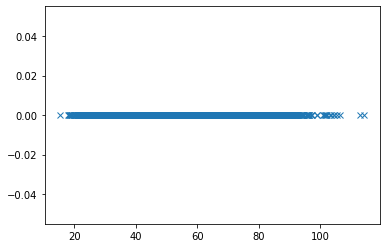

In [207]:
plt.plot(distances_to_overall_distribution,pd.Series([0]).repeat(10000),'x')

In [208]:
distances_to_overall_distribution.sort_values()

user_id
8567     15.331173
1503     17.963608
2409     18.284289
3307     18.387982
3360     18.602906
           ...    
9125    104.286987
874     105.351769
6142    106.440007
1429    113.010361
5343    114.257514
Name: squared_distance, Length: 10000, dtype: float64

In [209]:
fig=px.scatter(x=distances_to_overall_distribution.sort_values(),y=pd.Series([0]).repeat(10000),height=350,width=1000)
fig.update_layout(
    xaxis_title="Distance between distribution and overall distribution messured in percentage",
    yaxis_title="",
    yaxis_visible=False,
    xaxis_showgrid=False,xaxis_zeroline=False)
fig.update_traces(name="User distribution",marker_size=3, showlegend = True)
fig.add_scatter(x=[0],y=[0],name="Overall distribution",mode='markers')
fig.update_traces(marker_size=3, showlegend = True)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.97,
    xanchor="left",
    x=0.81
))
fig.show()

From the above figure it is clear that some of the users are very far away from the overall distribution.
We here take a look at the user with the distribution closest to the overall distribution.

In [210]:
user_max=individual_distributions[individual_distributions.user_id==distances_to_overall_distribution[distances_to_overall_distribution==distances_to_overall_distribution.max()].index[0]]

In [211]:
user_max

,package_name,overall_percentage,user_id,app_count,num_session,user_percentage,squared_distance
154947,bbc.mobile.news.uk,1.408525,5343,0.0,0.0,0.000000,1.983943
154948,com.amazon.mShop.android.shopping,0.996913,5343,1.0,1335.0,0.074906,0.850096
154949,com.android.chrome,18.917879,5343,16.0,1335.0,1.198502,313.976340
154950,com.android.incallui,4.042763,5343,933.0,1335.0,69.887640,4335.547925
154951,com.android.phone,0.851657,5343,44.0,1335.0,3.295880,5.974225
154952,com.ebay.mobile,1.463874,5343,0.0,0.0,0.000000,2.142927
154953,com.facebook.katana,30.563688,5343,46.0,1335.0,3.445693,735.385677
154954,com.facebook.orca,10.596782,5343,40.0,1335.0,2.996255,57.768009
154955,com.google.android.apps.maps,4.073731,5343,0.0,0.0,0.000000,16.595285
154956,com.google.android.apps.messaging,1.130486,5343,0.0,0.0,0.000000,1.277999


In [224]:
fig = px.bar(x=user_max.package_name, y =user_max.user_percentage,barmode='group',width=900,height=600)
fig.update_traces(name="User distribution",showlegend = True)
fig.update_layout(
    xaxis_title="Apps",
    yaxis_title="Percent of session with app")
fig.add_bar(x=user_min.package_name, y=user_min.overall_percentage,name="Overall distribution")
fig.update_traces(showlegend = True)
fig.update_xaxes(type='category',tickangle = 45)

Similarly the distribution for the user closest to the overall distribution is here shown

In [213]:
user_min=individual_distributions[individual_distributions.user_id==distances_to_overall_distribution[distances_to_overall_distribution==distances_to_overall_distribution.min()].index[0]]

In [223]:
fig = px.bar(x=user_min.package_name, y =user_min.user_percentage,barmode='group',width=900,height=600)
fig.update_traces(name="User distribution",showlegend = True)
fig.update_layout(
    xaxis_title="Apps",
    yaxis_title="Percent of session with app")
fig.add_bar(x=user_min.package_name, y=user_min.overall_percentage,name="Overall distribution")
fig.update_traces(showlegend = True)
fig.update_xaxes(type='category',tickangle = 45)

## User support for patterns
In the following section it will be investigate how many og the users actually support the obtained patterns.

In [244]:
df_patterns=pd.DataFrame({'pattern':frequent_apps})

In [ ]:
df_corpus.str.contains(df_patterns.loc[0,'pattern']).groupby('user_id').any().sum()

In [279]:
df_patterns['user_support']=df_patterns.pattern.apply(lambda l: user_corpus.str.contains(l).groupby('user_id').any().sum())

In [290]:
df_patterns['user_support']=df_patterns.user_support/10000*100

In [292]:
df_patterns.sort_values('user_support')

,pattern,user_support
9,com.google.android.apps.messaging,10.97
28,com.yahoo.mobile.client.android.mail,11.61
0,bbc.mobile.news.uk,22.00
15,com.microsoft.office.outlook,28.71
16,com.nianticlabs.pokemongo,30.27
10,com.google.android.calendar,46.05
26,com.twitter.android,47.30
17,com.snapchat.android,47.97
18,com.sony.nfx.app.sfrc,49.66
5,com.ebay.mobile,55.73


In [286]:
df_patterns_2=pd.DataFrame({'pattern':lengt_2_patterns})
df_patterns_2['user_support']=df_patterns_2.pattern.apply(lambda l: user_corpus.str.contains(l).groupby('user_id').any().sum())

In [293]:
df_patterns_2['user_support']=df_patterns_2.user_support/10000*100

In [295]:
df_patterns_2.sort_values('user_support')

,pattern,user_support
8,com.facebook.katana com.snapchat.android,38.66
18,com.snapchat.android com.facebook.katana,38.70
22,com.sonymobile.email com.facebook.katana,39.53
17,com.instagram.android com.whatsapp,44.74
27,com.whatsapp com.instagram.android,45.07
7,com.facebook.katana com.instagram.android,51.21
16,com.instagram.android com.facebook.katana,51.39
25,com.whatsapp com.facebook.orca,70.07
3,com.android.incallui com.sonyericsson.android.socialphonebook,72.43
10,com.facebook.katana com.whatsapp,72.61


In [287]:
df_patterns_3=pd.DataFrame({'pattern':length_3_patterns})
df_patterns_3['user_support']=df_patterns_3.pattern.apply(lambda l: user_corpus.str.contains(l).groupby('user_id').any().sum())

In [296]:
df_patterns_3['user_support']=df_patterns_3.user_support/10000*100

In [297]:
df_patterns_3.sort_values('user_support')

,pattern,user_support
1,com.whatsapp com.facebook.katana com.whatsapp,66.31
0,com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox,80.73
